# Generating Pulses

Here is a demonstrastion of how to generate a single SASE pulse

The 'sase.pulse' function generates an array containing a scalar complex electric field representation of an XFEL Source. The pulse function takes as its input the following parameters:

1. Mesh Definition: numpy.ndarrays defining the extent of the wavefield array in space (m) and time (t)
2. X-ray Properties: Photon energy (eV), Pulse energy (J), spectral bandwidth ($\Delta E/E$)
3. Gaussian Properties: Pulse width (m), Pulse duration (s) and Divergence half-angle ($\theta$) 
4. Pulse Error: Spatial (m) and Temporal jitter (s), Transverse pointing error (rad.)

See the module [documentation](https://twguest.github.io/phenom/API.html#phenom.source.sase_pulse) for more

We begin by importing the sase_pulse function from the phenom.source module:

## Generate a Single Pulse

In [1]:
from phenom.source import sase_pulse
from phenom.spectrum import linear_SASE_spectrum

from which we can define a pulse of arbitrary characteristics

In [3]:
import numpy as np

## define the spatial/temporal mesh
x = y = np.linspace(-250e-06, 250e-06, 500) 
t = np.linspace(-25e-15, 25e-15, 250)

sase = linear_SASE_spectrum(t, 5e-03 , 5e-15, 9200)

## define the pulse
pulse = sase_pulse(x = x,
                   y = y,
                   t = t,
                   photon_energy = 9200.,
                   pulse_energy = 1e-04,
                   pulse_duration = 5e-15,
                   bandwidth = 1e-12,
                   sigma = 50e-06,
                   div = 2.5e-03,
                   x0 = 0.0,
                   y0 = 0.0,
                   t0 = 0.0,
                   theta_x = 0.0,
                   theta_y = 0.0
                  )

We can visualise the spatial and temporal intensity properties of this field:

Text(0.5, 0, 'Time (fs)')

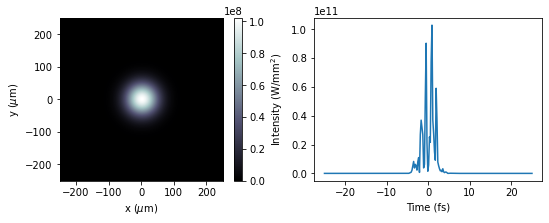

In [5]:
from matplotlib import pyplot as plt


fig, [ax1, ax2] = plt.subplots(1,2, figsize = (9,3))

### spatial intensity
im = ax1.imshow((abs(pulse)**2).sum(axis = 2),
                extent = [x.min() * 1e06,
                          x.max() * 1e06,
                          y.min() * 1e06,
                          y.max() * 1e06],
                cmap = 'bone'
                )

plt.colorbar(im, label = "Intensity (W/mm$^2$)", ax = ax1)

ax1.set_xlabel('x ($\mu$m)')
ax1.set_ylabel('y ($\mu$m)')


ax2.plot(t*1e15, (abs(pulse)**2).sum(axis = (0,1)))
ax2.set_xlabel("Time (fs)")